In [5]:
from src.data import *
from src.model import DiffusionMap
from src.train import *
import time
from matplotlib import pylab
import datafold.pcfold as pfold
import seaborn as sns
from sklearn.svm import SVC
%load_ext autoreload
%autoreload 2

## Swiss Roll

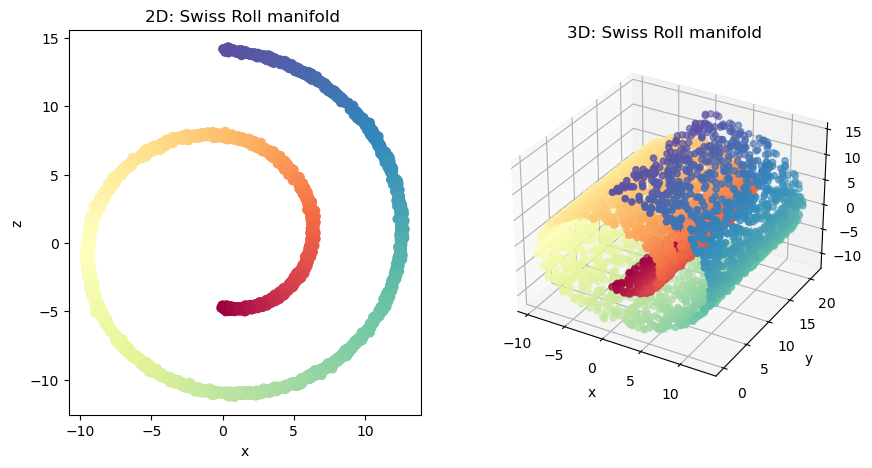

In [5]:
#n=50000 crashed
#n=40000 crashed
#n=30000 crashed
#n=20000 crashed
nr_samples=5000
data, timesteps = get_swiss_roll(nr_samples)
plot_swiss_roll_dmap(nr_samples,data, timesteps)

In [7]:
L=10
dmap = DiffusionMap()
start = time.time()
evecs, evals = dmap.diffusion_map_datafold(data,L,isSwissRoll=True)
end = time.time()

print(f"The run time is : {end - start}")

The run time is : 3.2719953060150146


Print 10 largest eigenvalues for the corresponding dataset: 
 [1.         0.99951212 0.99804945 0.9956249  0.9922962  0.9919117
 0.99132751 0.98996658 0.98809607 0.98765748]


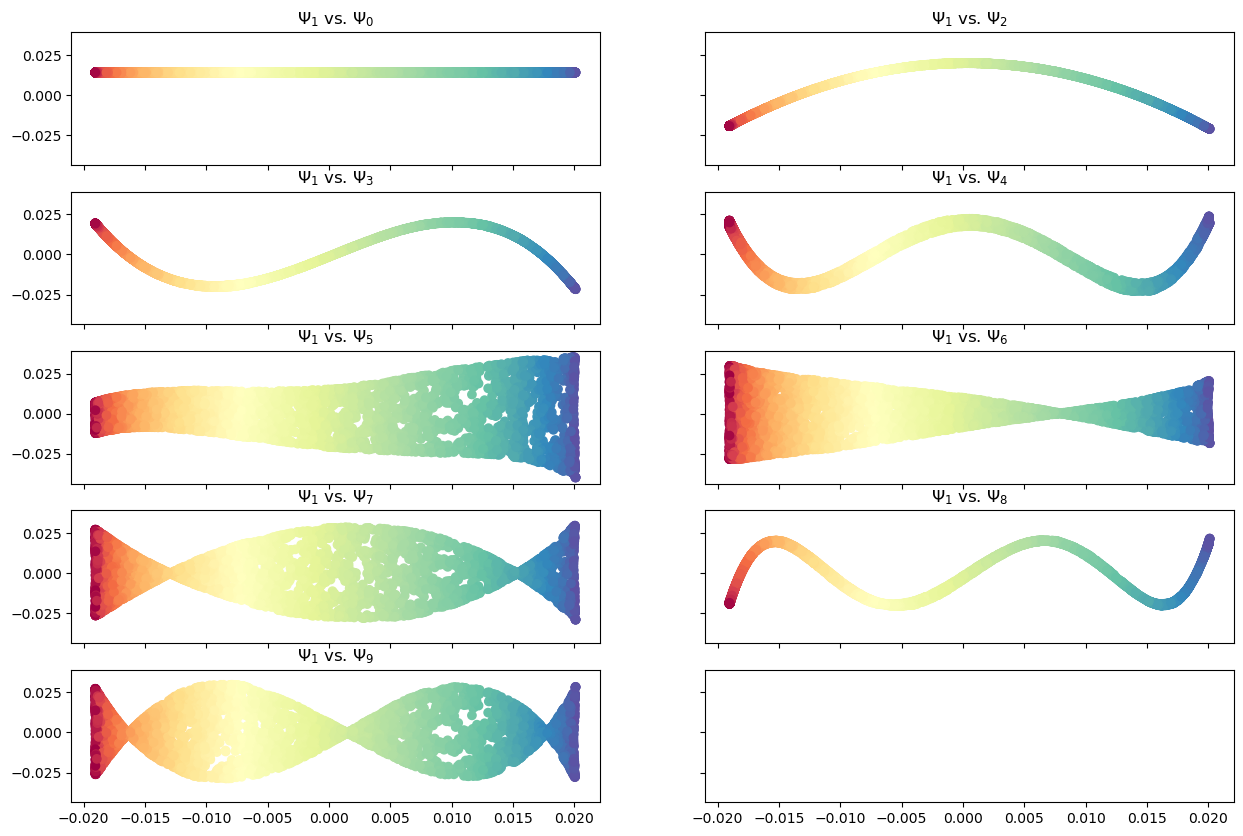

In [10]:
plot_diffusion_maps_swissRoll(nr_samples, L, evecs, evals ,time=timesteps)

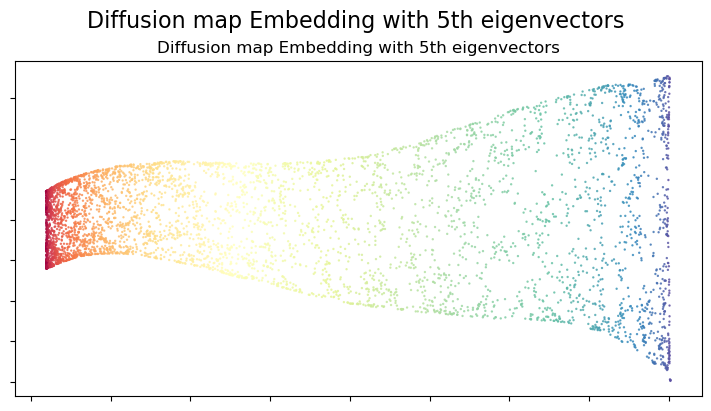

In [11]:
phi_l_plot = np.concatenate((evecs[:, 1].reshape(-1, 1), evecs[:, 5].reshape(-1, 1)), axis=1)
plot_dmap_2d(phi_l_plot, timesteps, "Diffusion map Embedding with 5th eigenvectors")

## Word2vec

In [16]:
gensim_model  = gensim.downloader.load("word2vec-google-news-300")

In [22]:
#10000 crashed
num_data_sample=5000

index = np.random.randint(0, len(gensim_model.index_to_key), (num_data_sample))
words = [gensim_model.index_to_key[i] for i in index]
embeddings = [gensim_model[word] for word in words]

In [23]:
data_word=np.array(embeddings)
X = data_word

In [24]:
L_cifar=2
dmap=DiffusionMap()
start = time.time()
Word_dmap,val=dmap.diffusion_map_datafold(X,L_cifar,isSwissRoll=False)
end = time.time()
print(f"The run time is : {end - start}")

The run time is : 208.83165884017944


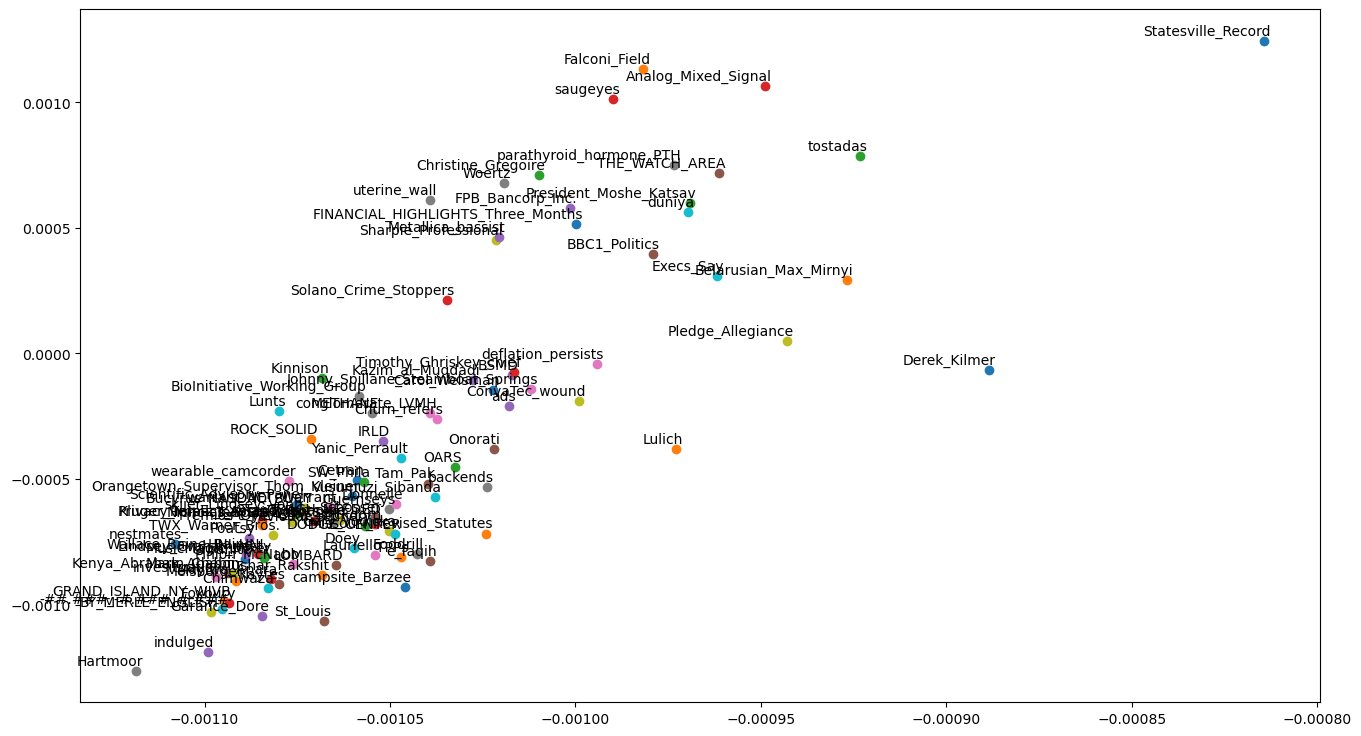

In [25]:
plot_word_embedding_damp(Word_dmap[:,1:3], words)

China Beijing
Russia Moscow
Japan Tokyo
Turkey Ankara
Poland Warsaw
Germany Berlin
France Paris
Italy Athens
Greece Rome
Spain Madrid
Portugal Lisbon


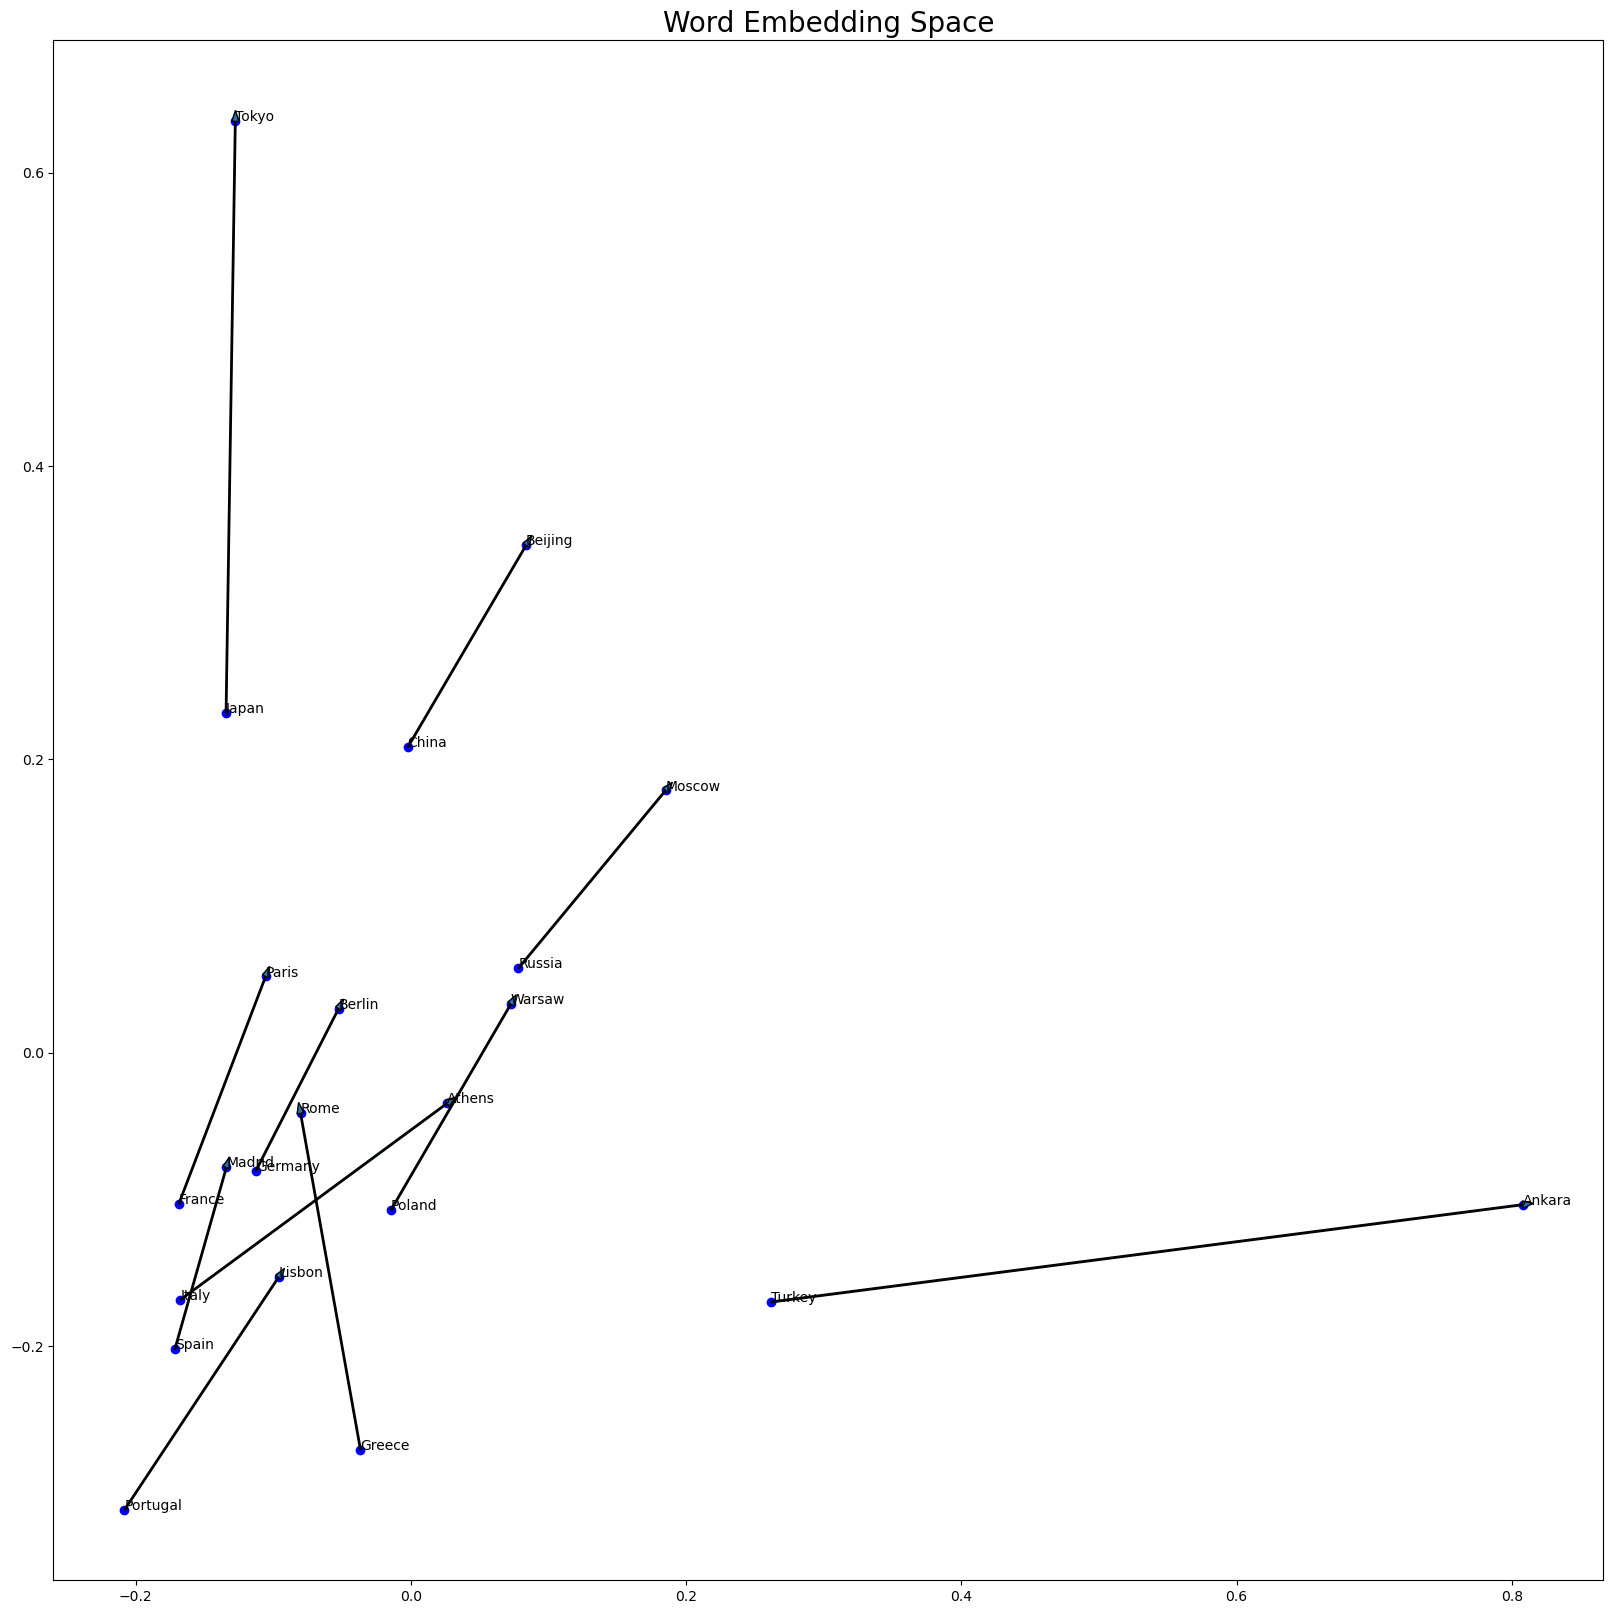

In [28]:
countries = ['China', 'Russia', 'Japan', 'Turkey', 'Poland', 'Germany', 'France', 'Italy', 'Greece', 'Spain', 'Portugal']
capitals = ['Beijing', 'Moscow', 'Tokyo', 'Ankara', 'Warsaw', 'Berlin', 'Paris', 'Athens', 'Rome', 'Madrid', 'Lisbon']
embeddings = [gensim_model[word] for word in countries + capitals]
embeddings = np.array(embeddings)
L_cifar=2
dim_red_em,val = dmap.diffusion_map_datafold(embeddings,L_cifar,isSwissRoll=False)

dim_red_em = dim_red_em[:,1:]
word_embedding_plot(dim_red_em, countries + capitals)

for i in range(len(countries)):
    country = dim_red_em[i]
    capital = dim_red_em[i+len(countries)]
    print(countries[i], capitals[i])
    plt.arrow(country[0], country[1], capital[0]-country[0], capital[1]-country[1], head_width = 0.005)

## Cifar 10

In [9]:
train_loader, val_loader, test_loader = cifar10(train_val_split = [45000, 5000], batch_size=32)


Files already downloaded and verified
Files already downloaded and verified


images.shape: torch.Size([32, 3, 32, 32])


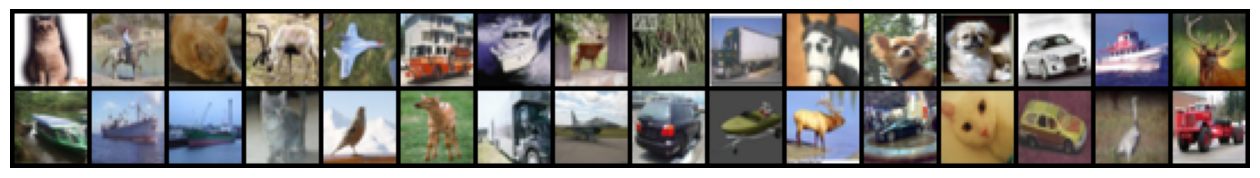

In [10]:
from torchvision.utils import make_grid
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [26]:
num_sample=5024
train_images ,train_labels=cifar10_dmap(train_loader,num_sample)


Train labels shape: (5024,)
Train images shape: (5024, 3072)


In [12]:
L_cifar=6
dmap_caifar = DiffusionMap()

start = time.time()
phi_l_cifar, lambda_l_cifar  = dmap_caifar.diffusion_map_datafold(train_images,L_cifar,isSwissRoll=False)
end = time.time()

print(f"The run time is : {end - start}")


The run time is : 257.0743176937103


In [13]:
phi_l_cifar.shape

(4736, 6)

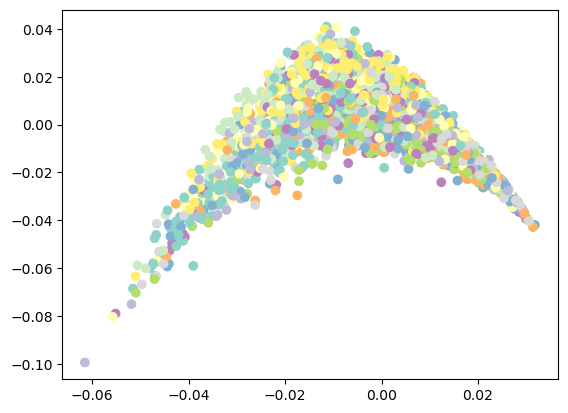

In [35]:
plt.scatter(phi_l_cifar[:, 1], phi_l_cifar[:, 2], c=train_labels, cmap='Set3')

Print 6 largest eigenvalues for the corresponding dataset: 
 [1.         0.52294244 0.28476168 0.20889137 0.15083544 0.11862446]


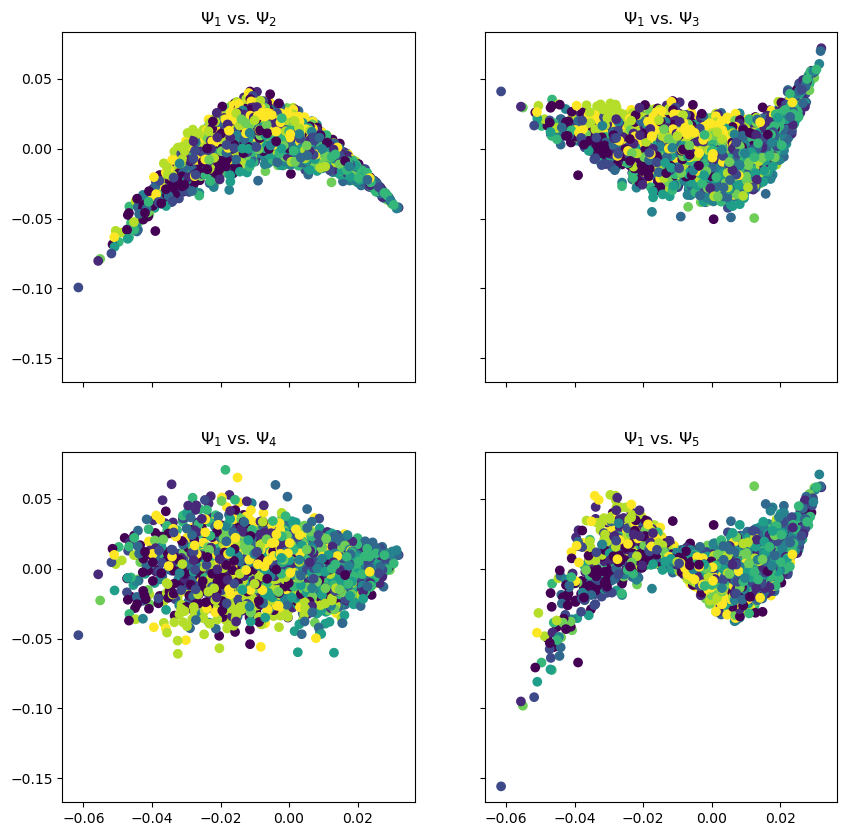

In [36]:
plot_diffusion_maps_cifar( L_cifar, phi_l_cifar, lambda_l_cifar,train_labels)

### Super Tiny Test for the accuracy before and after dimensionality reduction

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf_orignal = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [16]:
num_sample=512
val_images ,val_labels=cifar10_dmap(val_loader,num_sample)

Train labels shape: (512,)
Train images shape: (512, 3072)


In [18]:
clf_orignal.fit(train_images, train_labels)
score_original= clf_orignal.score(val_images ,val_labels)
print(score_original)

0.421875


### After Dimension Reduction:

In [19]:
L_cifar_reduce=6
dmap_caifar = DiffusionMap()

start = time.time()
phi_l_cifar_valreduce, lambda_l_cifar_valreduce  = dmap_caifar.diffusion_map_datafold(val_images,L_cifar_reduce,isSwissRoll=False)
end = time.time()

print(f"The run time is : {end - start}")

The run time is : 2.588162660598755


In [21]:
clf_reduce = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf_reduce.fit(phi_l_cifar, train_labels)
score_reduce= clf_reduce.score(phi_l_cifar_valreduce ,val_labels)
print(score_reduce)

0.1015625
